<a href="https://colab.research.google.com/github/LennRBriones/neural-networks-practices/blob/main/solving_regretion_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prediction house prices

In [1]:
import pandas as pd
import numpy as np
from keras.datasets import boston_housing
from keras import layers, models, optimizers


In [2]:
(train_data , train_targets) ,(test_data,test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [3]:
train_data.shape

(404, 13)

In [4]:
train_targets.shape

(404,)

In [5]:
train_targets[0]
#Here show us that the first house of the data cost 15,000 dollars

15.2

In [6]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

Here is neccesary a normalization, because the large diference between the values

## Normalization

In [7]:
mean = train_data.mean(axis=0)
train_data = train_data - mean #media 
std = train_data.std(axis=0)
train_data = train_data / std #standar
## Here we only use and modificate the train data, the test data isnt yet

test_data = test_data - mean
test_data = test_data / std

In [8]:
def build_model_regression(input_data):
    model = models.Sequential()
    model.add(layers.Dense(64, activation="relu", input_shape=(input_data,))) #13 is te variables that the houses have
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(1))                            #this time we don´t need clasification son we use cuadratic (mse)
    model.compile(optimizer= "rmsprop", loss="mse", metrics =["mae"])
    return model                                           #Is lineal regresion so we need this data 
    

## K-Fold validation


In [9]:
 
#iteration the dataset with the training

k = 4 #iterations
num_val_samples = len(train_data) // k
num_epoch = 65 ## original was 80
#we used 500 to estimate
all_history = [] #saving all historys

In [10]:
0*num_val_samples

0

In [11]:
(0+1) * num_val_samples

101

In [12]:
for i in range(k):
    print("Fold " , i)
    val_data = train_data[i*num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i*num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
     train_data[(i+1) * num_val_samples:]],
     axis= 0   
    )
    
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
     train_targets[(i+1) * num_val_samples:]],
     axis= 0   
    )    
    model = build_model_regression(13)
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epoch, batch_size =16, 
                        validation_data = (val_data, val_targets),
                        verbose=0)
    all_history.append(history.history['val_mae'])

Fold  0
Fold  1
Fold  2
Fold  3


In [13]:
all_history

[[20.001230239868164,
  17.083316802978516,
  13.077943801879883,
  8.479751586914062,
  5.251523494720459,
  3.8829729557037354,
  3.5159146785736084,
  3.3652942180633545,
  3.092085361480713,
  3.0027735233306885,
  2.8601315021514893,
  2.8286848068237305,
  2.7463152408599854,
  2.6928653717041016,
  2.510450839996338,
  2.495121479034424,
  2.4635531902313232,
  2.4421987533569336,
  2.5347466468811035,
  2.413397789001465,
  2.413428783416748,
  2.319744110107422,
  2.2331619262695312,
  2.2554430961608887,
  2.350522994995117,
  2.180715560913086,
  2.1404478549957275,
  2.129497766494751,
  2.1764156818389893,
  2.146543025970459,
  2.2083864212036133,
  2.1418776512145996,
  2.1510543823242188,
  2.078538417816162,
  2.2383952140808105,
  2.084569215774536,
  2.075010299682617,
  2.1290314197540283,
  2.1114375591278076,
  2.039141893386841,
  2.1015281677246094,
  2.1318211555480957,
  2.0960824489593506,
  2.201765537261963,
  2.0543854236602783,
  1.992682933807373,
  1.99

In [14]:
len(all_history[0])

65

## Results

In [15]:
all_mae_avg = pd.DataFrame(all_history).mean(axis=0)

In [16]:
all_mae_avg

0     19.530806
1     16.239613
2     12.220155
3      8.393051
4      6.190601
        ...    
60     2.385485
61     2.367469
62     2.480815
63     2.360355
64     2.394649
Length: 65, dtype: float64

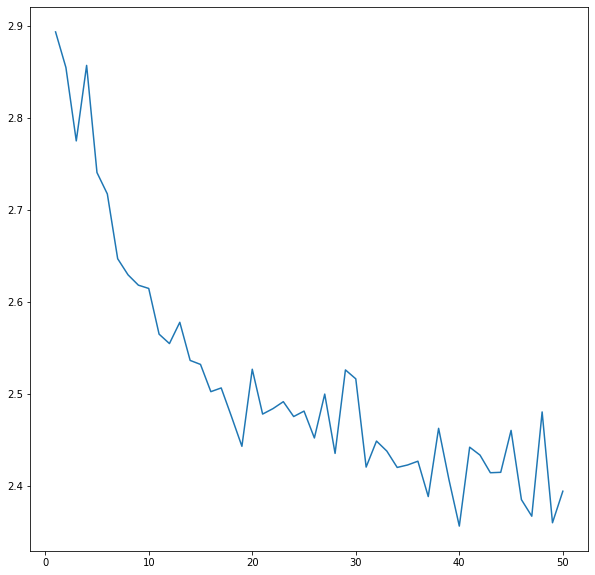

In [17]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
plt.plot(range(1, len(all_mae_avg[15:])+1), all_mae_avg[15:])
plt.show()

In [18]:
model.evaluate(test_data, test_targets)
#mean absolut error

4/4 [==============================] - 0s 4ms/step - loss: 22.3406 - mae: 2.8557


[22.34060287475586, 2.855675220489502]